In [1]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
from google.colab import drive
drive.mount('/content/gdrive')


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 457850176538219416
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7202654305853488776
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9247582683809678557
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11174966068
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4291776555251185403
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D ,AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


Using TensorFlow backend.


In [3]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(48,48,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(48,48,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),strides=2,padding='same'))
#fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
#fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='same'))
#fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))   
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))   
fashion_model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='same'))
#fashion_model.add(Dropout(0.3))
fashion_model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
#fashion_model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='same'))
fashion_model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))   
fashion_model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))   
#fashion_model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(256, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))  
fashion_model.add(Dropout(0.5))
fashion_model.add(Dense(256, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.5))
fashion_model.add(Dense(7, activation='softmax'))

fashion_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 24, 24, 64)        0         
__________

In [0]:
import csv
import numpy as np
from keras.utils import to_categorical
infile1 = open("/content/gdrive/My Drive/datafec/train.csv","r")
infile2 = open("/content/gdrive/My Drive/datafec/test.csv","r")
reader1 = csv.reader(infile1)
reader2 = csv.reader(infile2)

In [5]:
train_X = []
train_Y = []
for row in reader1: 
  col_num = 0
  for col in row:
    if col_num==0:
      train_Y.append(col)
    if col_num==1:
      a=col.split(' ')
      map(float, a)
      train_X.append(a)
    col_num +=1

#train_X=np.asarray(te2,dtype='float')
train_X=np.asarray(train_X)
train_X = train_X.reshape((train_X.shape[0],48,48))
#train_X= train_X.reshape(train_X.shape[0],1,48,48)
train_Y=np.asarray(train_Y)
print(train_X.shape,train_Y.shape)

(28709, 48, 48) (28709,)


In [6]:
test_X = []
test_Y = []

for row in reader2: 
  col_num = 0
  for col in row:
    if col_num==0:
      map(float,col)
      test_Y.append(col)
    if col_num==1:
      a=col.split(' ')
      map(float, a)
      test_X.append(a)
    col_num +=1

test_X=np.asarray(test_X)
test_X = test_X.reshape((test_X.shape[0],48,48))
#test_X= test_X.reshape(test_X.shape[0],1,48,48)
test_Y=np.asarray(test_Y)
print(test_X.shape,test_Y.shape)

(3589, 48, 48) (3589,)


In [7]:
fashion_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 24, 24, 64)        0         
__________

In [8]:
classes=np.unique(train_Y)
nClasses=len(classes)
print('total no of classes:',nClasses)

train_X=train_X.reshape(-1,48,48,1)
test_X=test_X.reshape(-1,48,48,1)
print(train_X.shape,test_X.shape)

train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
train_X=train_X/255.
test_X=test_X/255.

total no of classes: 7
(28709, 48, 48, 1) (3589, 48, 48, 1)


In [9]:
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
K.set_image_dim_ordering('th')
datagen = ImageDataGenerator(samplewise_center=True,rotation_range=45,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,)
# fit parameters from data
datagen.fit(train_X)
x_train=np.copy(train_X)
y_train=np.copy(train_Y)
print(x_train.shape,y_train.shape)
# configure batch size and retrieve one batch of images
i=0
for X_batch, y_batch in datagen.flow(train_X, train_Y, batch_size=50):
  i=i+1
  
  #print(X_batch,y_batch)
  print(X_batch.shape,y_batch.shape)
  #x_train.append(X_batch)
  #y_train.append(y_batch)
  x_train=np.append(x_train, X_batch)
  y_train=np.append(y_train,y_batch)
  if i==1000:
    break
print(x_train.shape,y_train.shape)

fashion_model.summary()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:1358: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (28709, 48, 48, 1) (48 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:1643: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (28709, 48, 48, 1) (48 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


(28709, 48, 48, 1) (28709,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50,

In [10]:
datagen1 =  ImageDataGenerator(samplewise_center=True,rotation_range=-45,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,)
# fit parameters from data
datagen1.fit(train_X)
#x_train=np.copy(train_X)
#y_train=np.copy(train_Y)
print(x_train.shape,y_train.shape)
# configure batch size and retrieve one batch of images
i=0
for X_batch, y_batch in datagen1.flow(train_X, train_Y, batch_size=50):
  i=i+1
  #for j in range(0, 9):
		# pyplot.subplot(330 + 1 + j)
		# pyplot.imshow(X_batch[j].reshape(48, 48), cmap=pyplot.get_cmap('gray'))
	# show the plot
  #pyplot.show()
  #break
  #print(X_batch,y_batch)
  print(X_batch.shape,y_batch.shape)
  #x_train.append(X_batch)
  #y_train.append(y_batch)
  x_train=np.append(x_train, X_batch)
  y_train=np.append(y_train,y_batch)
  if i==1000:
    break
print(x_train.shape,y_train.shape)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:1358: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (28709, 48, 48, 1) (48 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:1643: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (28709, 48, 48, 1) (48 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


(181251072,) (78668,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 48, 1) (50,)
(50, 48, 4

In [11]:
print(x_train.shape,y_train.shape) 
x_train=x_train.reshape(-1,48,48,1)
test_X=test_X.reshape(-1,48,48,1)
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(test_Y)
print(x_train.shape,y_train.shape)


(296356608,) (128627,)
(128627, 48, 48, 1) (128627,)


In [12]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(x_train, train_Y_one_hot, test_size=0.2, random_state=13)
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

batch_size = 256
epochs = 90
num_classes = 7


(102901, 48, 48, 1) (25726, 48, 48, 1) (102901, 7) (25726, 7)


In [13]:
fashion_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 24, 24, 64)        0         
__________

In [0]:

fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(momentum=0.9),metrics=['accuracy'])


In [15]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Train on 102901 samples, validate on 25726 samples
Epoch 1/90
102901/102901 [==============================] - 74s 724us/step - loss: 1.8237 - acc: 0.2509 - val_loss: 1.8104 - val_acc: 0.2505
Epoch 2/90
102901/102901 [==============================] - 69s 672us/step - loss: 1.8121 - acc: 0.2520 - val_loss: 1.8104 - val_acc: 0.2505
Epoch 3/90
102901/102901 [==============================] - 69s 672us/step - loss: 1.8106 - acc: 0.2520 - val_loss: 1.8080 - val_acc: 0.2505
Epoch 4/90
102901/102901 [==============================] - 69s 672us/step - loss: 1.7871 - acc: 0.2601 - val_loss: 1.7342 - val_acc: 0.2933
Epoch 5/90
102901/102901 [==============================] - 69s 672us/step - loss: 1.6594 - acc: 0.3384 - val_loss: 1.5484 - val_acc: 0.3915
Epoch 6/90
102901/102901 [==============================] - 69s 673us/step - loss: 1.4957 - acc: 0.4201 - val_loss: 1.4021 - val_acc: 0.4534
Epoch 7/90
102901/102901 [==============================] - 69s 673us/step - loss: 1.3358 - acc: 0.4882

In [16]:
fashion_model.save("fashion_model_dropout_paper(BKVGG12_1).h5py")
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 3.376051577328639
Test accuracy: 0.6012816940984144


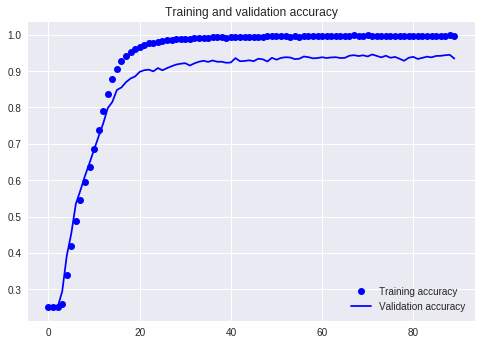

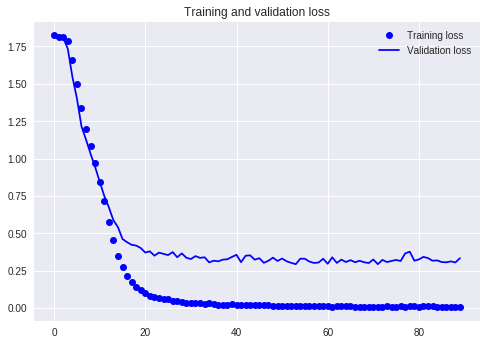

In [17]:
import matplotlib.pyplot as plt
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
test_Y=test_Y.astype('int64')
test_Y_one_hot = to_categorical(test_Y)

test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

print ('Test loss:', test_eval[0])
print ('Test accuracy:', test_eval[1])


Test loss: 3.376051577328639
Test accuracy: 0.6012816940984144


In [19]:
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
print (predicted_classes.shape, test_Y.shape)

print (predicted_classes.dtype,test_Y.dtype)

correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))

incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))

(3589,) (3589,)
int64 int64
Found 2148 correct labels
Found 1441 incorrect labels


In [20]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print (classification_report(test_Y, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.46      0.54      0.50       467
    Class 1       0.89      0.57      0.70        56
    Class 2       0.45      0.46      0.45       496
    Class 3       0.80      0.80      0.80       895
    Class 4       0.50      0.47      0.48       653
    Class 5       0.76      0.76      0.76       415
    Class 6       0.53      0.50      0.51       607

avg / total       0.60      0.60      0.60      3589



In [0]:
from google.colab import files
files.download('fashion_model_dropout_paper(BKVGG12_1).h5py')